# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [ ]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

In [2]:
URL = 'https://api.hh.ru/vacancies'

request_data = [
    {'text': 'Data Scientist', 'pages': 3},
    {'text': 'Аналитик Данных', 'pages': 20},
]


def wait():
    sleep(0.5)

##### (Количество страниц дял каждого запроса установлено опытным путем)f

In [3]:
data = []

for reqd in request_data:
    for page_n in range(reqd['pages']):
        wait()
        req = requests.get(URL, {
            'text': reqd['text'],
            'area': 1,
            'page': page_n,
            'per_page': 100
        })
        data += json.loads(req.content.decode())['items']

В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [4]:
def delete_copies(data):
    new_data = []
    used_id = []
    for vacancy in data:
        key = vacancy['id']
        if key not in used_id:
            used_id.append(key)
            new_data.append(vacancy)
    return new_data


data = delete_copies(data)

Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [6]:
vacancies = []

for vacancy in data:
    vac_id = vacancy['id']
    vacancy_url = f'https://api.hh.ru/vacancies/{vac_id}'
    wait()
    req = requests.get(vacancy_url)
    vacancies.append(json.loads(req.content.decode()))

In [7]:
df = pd.json_normalize(vacancies)
df.set_index('id', inplace=True)
df.to_excel('da_data.xlsx')

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [8]:
len(df)

2233

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

In [9]:
skill_counter = dict()

for i in df.index:
    skills = df.loc[i, 'key_skills']
    for skill in skills:
        skill_ = skill['name']
        if skill_ not in skill_counter:
            skill_counter[skill_] = 1
        else:
            skill_counter[skill_] += 1

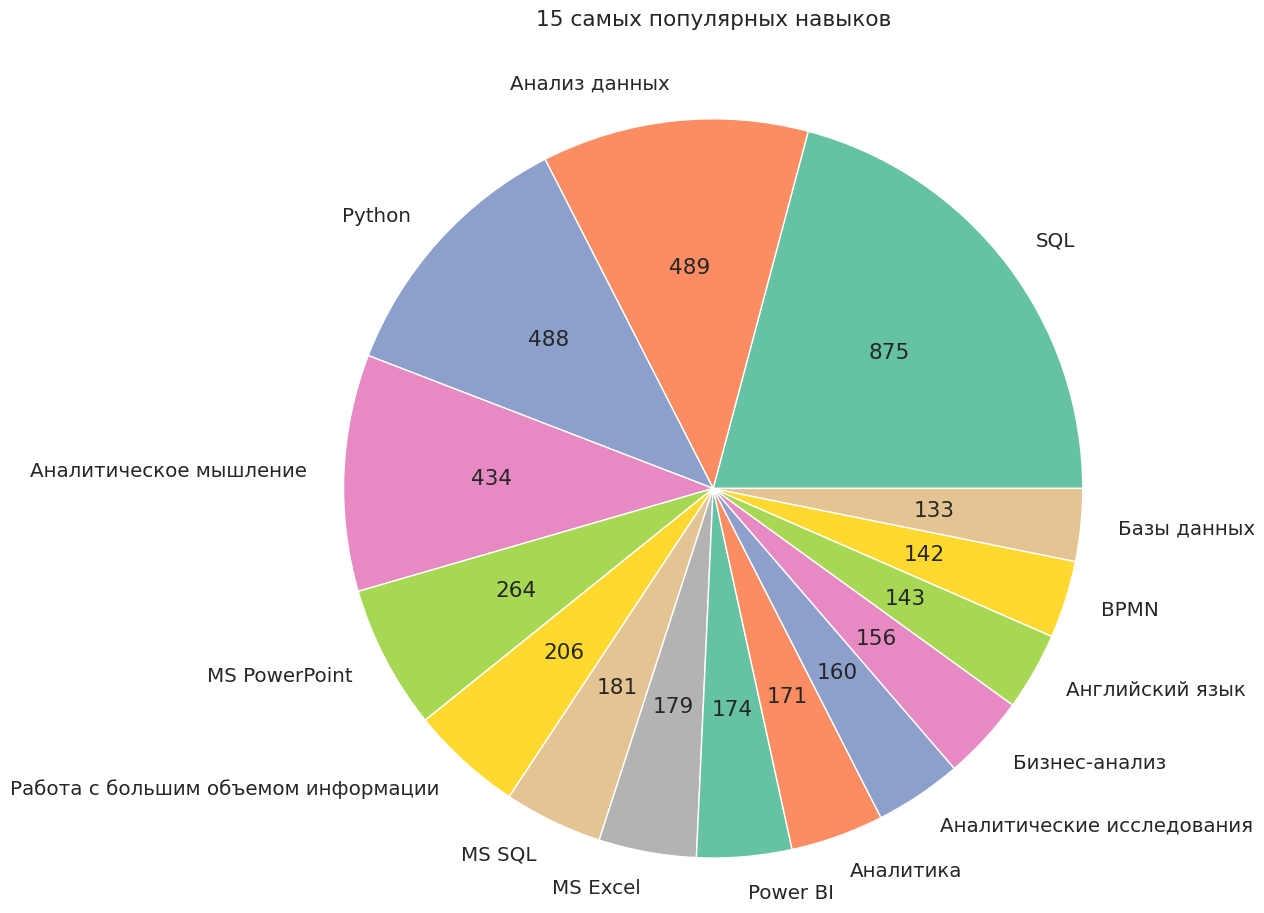

In [10]:
import collections

top_15_skills = dict(collections.Counter(skill_counter).most_common(15))

values = top_15_skills.values()
labels = top_15_skills.keys()

plt.pie(values, labels=labels, radius=2.5, autopct=(lambda x: int(np.round(x / 100. * (sum(values)), 0))))
plt.title('15 самых популярных навыков', pad=200)
plt.show()

In [32]:
1+5

##### Описание графика: Самые популярные навыки - SQL, Python, а так же все что связано с аналитикой и работой с данными.

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

In [11]:
exchange_rate = {
    'EUR': 80.03,
    'RUR': 1,
    'USD': 75.5,
}
gross_coefficients = {
    True: 0.87,
    False: 1,
}

salaries = list(filter(
    lambda x: x is not None,
    [vacancy['salary'] for vacancy in vacancies]
))

for salary in salaries:
    for i in ['from', 'to']:
        salary[i] = salary[i] * gross_coefficients[salary['gross']] * exchange_rate[salary['currency']] if salary[
            i] else salary[i]

In [12]:
max_salary = max(list(filter(
    lambda x: x is not None,
    [x['to'] for x in salaries]
)))
max_salary = int(max_salary)
max_salary

656850

In [13]:
max_salary = 650000

##### (Округлил до 650000 для удобства)

In [14]:
step = 50000

salaries_range = [value for value in range(0, max_salary + step, step)]

salaries_cnt = {value: 0 for value in salaries_range}

for salary in salaries:
    sf = salary['from'] if salary['from'] is not None else 0
    st = salary['to'] if salary['to'] is not None else max_salary
    st = st if st <= max_salary else max_salary
    values = list(filter(
        lambda x: sf <= x <= st,
        salaries_range
    ))
    for value in values:
        salaries_cnt[value] += 1

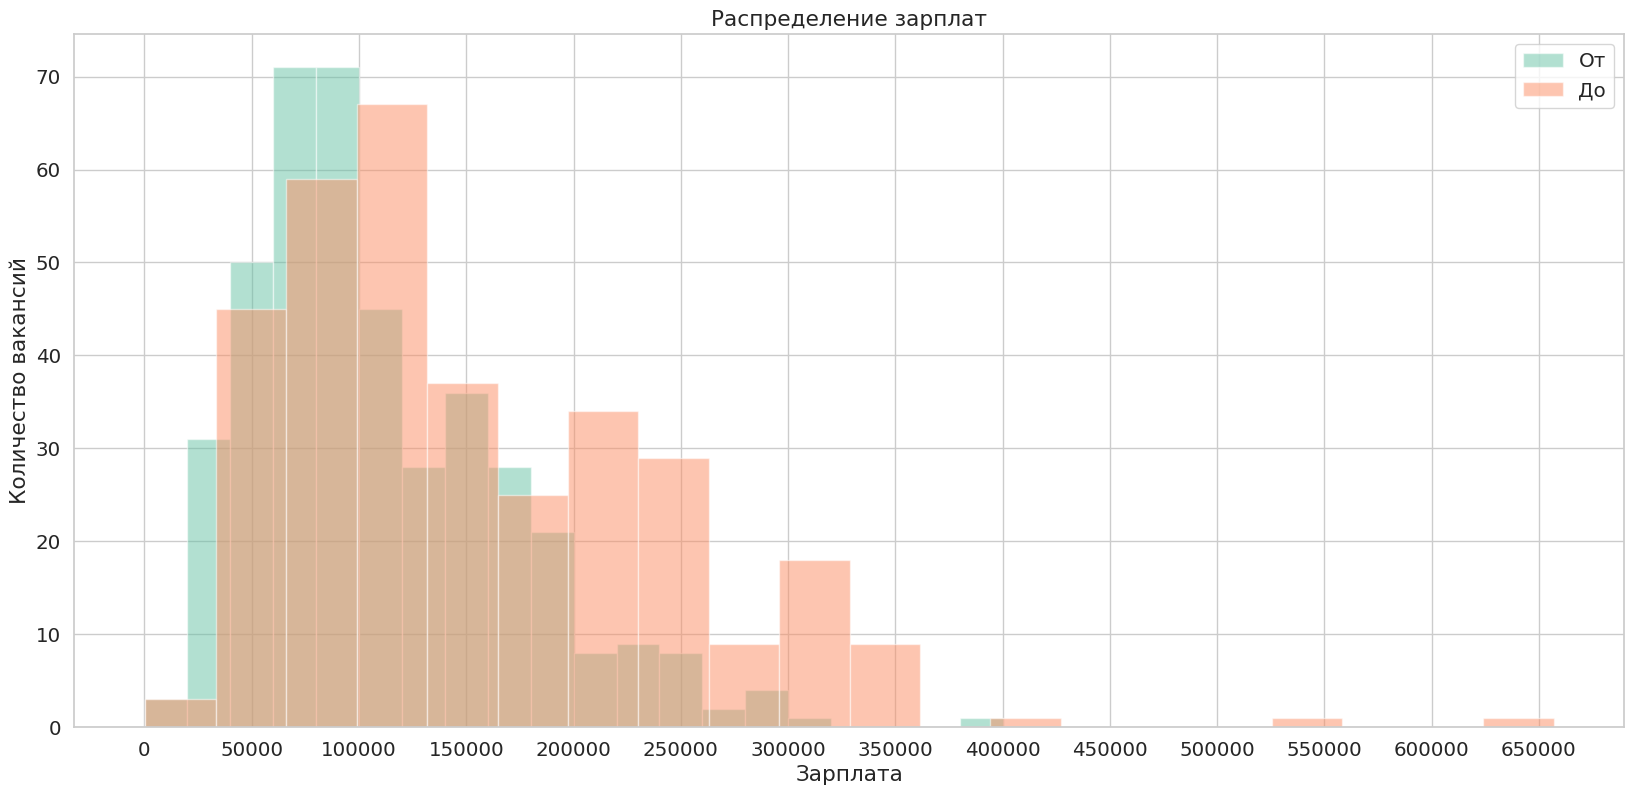

In [15]:
from_ = list(filter(
    lambda x: x is not None,
    [x['from'] for x in salaries]
))

to_ = list(filter(
    lambda x: x is not None,
    [x['to'] for x in salaries]
))

plt.figure(figsize=(20, 9))
plt.hist(from_, bins=20, alpha=0.5)
plt.hist(to_, bins=20, alpha=0.5)
plt.legend(['От', 'До'])
plt.xticks(salaries_range)
plt.title('Распределение зарплат')
plt.xlabel('Зарплата')
plt.ylabel('Количество вакансий')
plt.show()

##### Описание графика: Чем больше зарплата тем меньше вакансий... Основная зарплатная вилка - 40-170 тыс рублей (Net, RUR).

#### Вывод
##### Проведенное исследование показало, что по запросам по типу 'Data Scientist' существует 2233 вакансии на hh.ru. Чаще всего работадатели предлагают зарплату от 40 до 170 тысяч рублей, некоторые готовы платить до 550 - 650 тысяч (возможно, в этих вакансиях могут быть и бОльшие зарплаты, но, к сожалению, верхний лимит з/п был указан не везде). Больше всего в будущих сотрудниках работадатели хотя видеть знание SQL, Python, Анализа Данных, Аналитики и сопутствующих дисциплин.

---

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

##### Проведу исследование для профессии санитара.

In [ ]:
URL = 'https://api.hh.ru/vacancies'

data_ = []

profession = 'санитар'
pages = 11  # Опять же опытным путем

for page_n in range(pages):
    wait()
    req = requests.get(URL, {
        'text': profession,
        'area': 1,
        'per_page': 100,
        'page': page_n,
    })
    data_ += json.loads(req.content.decode())['items']

In [ ]:
data_ = delete_copies(data_)

In [ ]:
vacancies_ = []

for vacancy in data_:
    vac_id = vacancy['id']
    vacancy_url = f'https://api.hh.ru/vacancies/{vac_id}'
    wait()
    req = requests.get(vacancy_url)
    vacancies_.append(json.loads(req.content.decode()))

In [ ]:
df_ = pd.json_normalize(vacancies_)
df_.set_index('id', inplace=True)
df_.to_excel('sanitar_data.xlsx')

In [368]:
len(df_)

1002

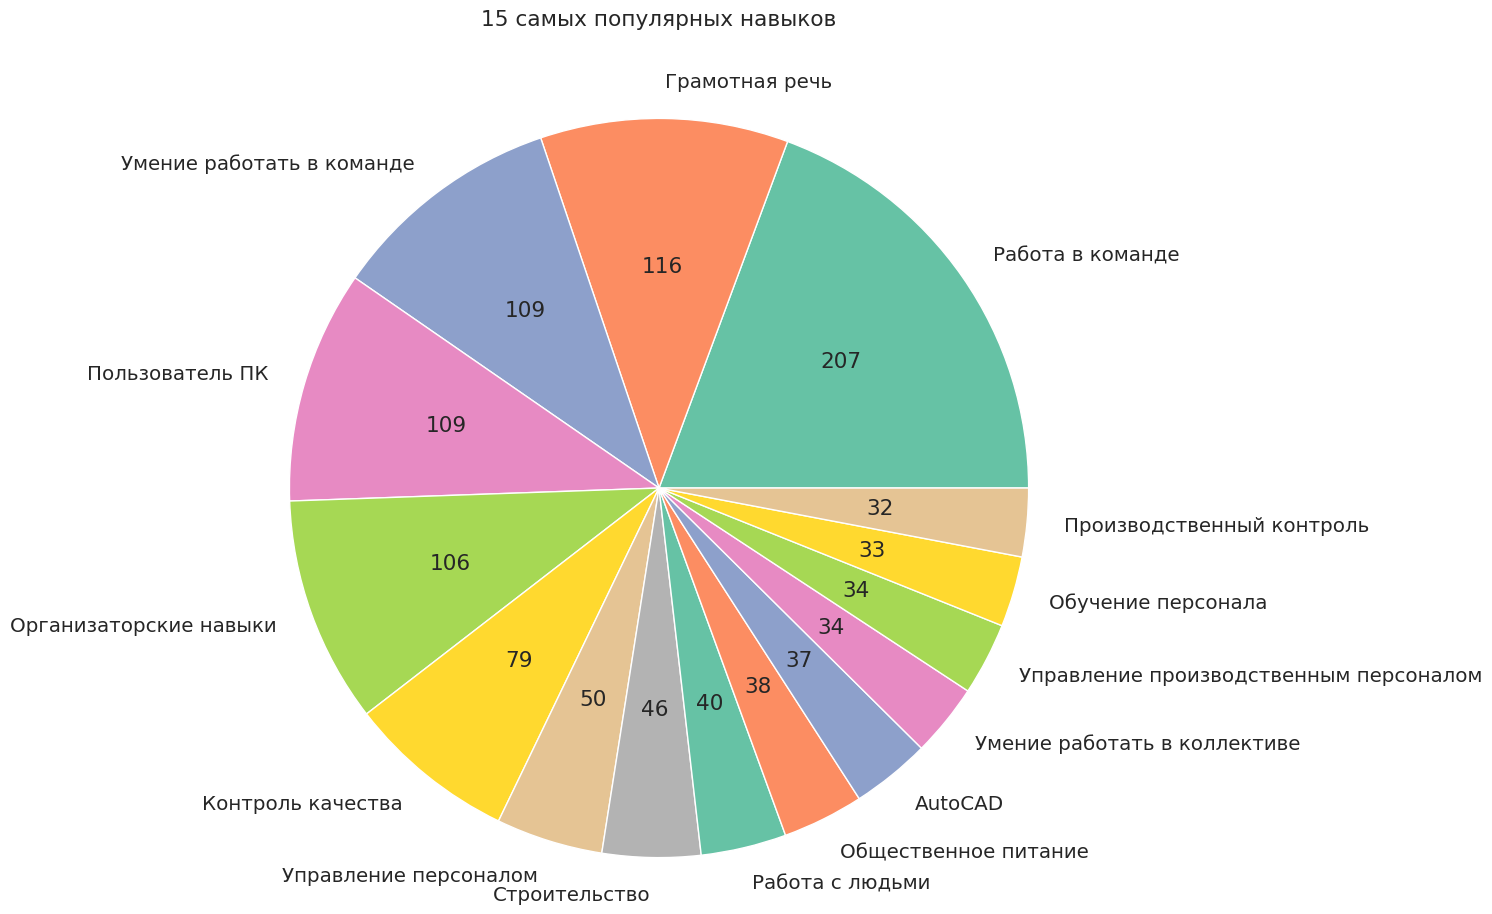

In [381]:
skill_counter = dict()

for i in df_.index:
    skills = df_.loc[i, 'key_skills']
    for skill in skills:
        skill_ = skill['name']
        if skill_ not in skill_counter:
            skill_counter[skill_] = 1
        else:
            skill_counter[skill_] += 1

import collections

top_15_skills = dict(collections.Counter(skill_counter).most_common(15))

values = top_15_skills.values()
labels = top_15_skills.keys()

plt.pie(values, labels=labels, radius=2.5, autopct=(lambda x: int(np.round(x / 100. * (sum(values)), 0))))
plt.title('15 самых популярных навыков', pad=200)
plt.show()

##### Описание графика: Самые популярные навыки - связанные с работой в команде и общением с людьми.

In [370]:
salaries_ = list(filter(
    lambda x: x is not None,
    [vacancy['salary'] for vacancy in vacancies_]
))

for salary in salaries_:
    for i in ['from', 'to']:
        salary[i] = salary[i] * gross_coefficients[salary['gross']] * exchange_rate[salary['currency']] if salary[
            i] else salary[i]

In [371]:
max_salary = max(list(filter(
    lambda x: x is not None,
    [x['to'] for x in salaries_]
)))
max_salary = int(max_salary)
max_salary

348000

In [372]:
max_salary = 360000

In [373]:
step = 30000

salaries_range = [value for value in range(0, max_salary + step, step)]

salaries_cnt = {value: 0 for value in salaries_range}

for salary in salaries_:
    sf = salary['from'] if salary['from'] is not None else 0
    st = salary['to'] if salary['to'] is not None else max_salary
    st = st if st <= max_salary else max_salary
    values = list(filter(
        lambda x: sf <= x <= st,
        salaries_range
    ))
    for value in values:
        salaries_cnt[value] += 1

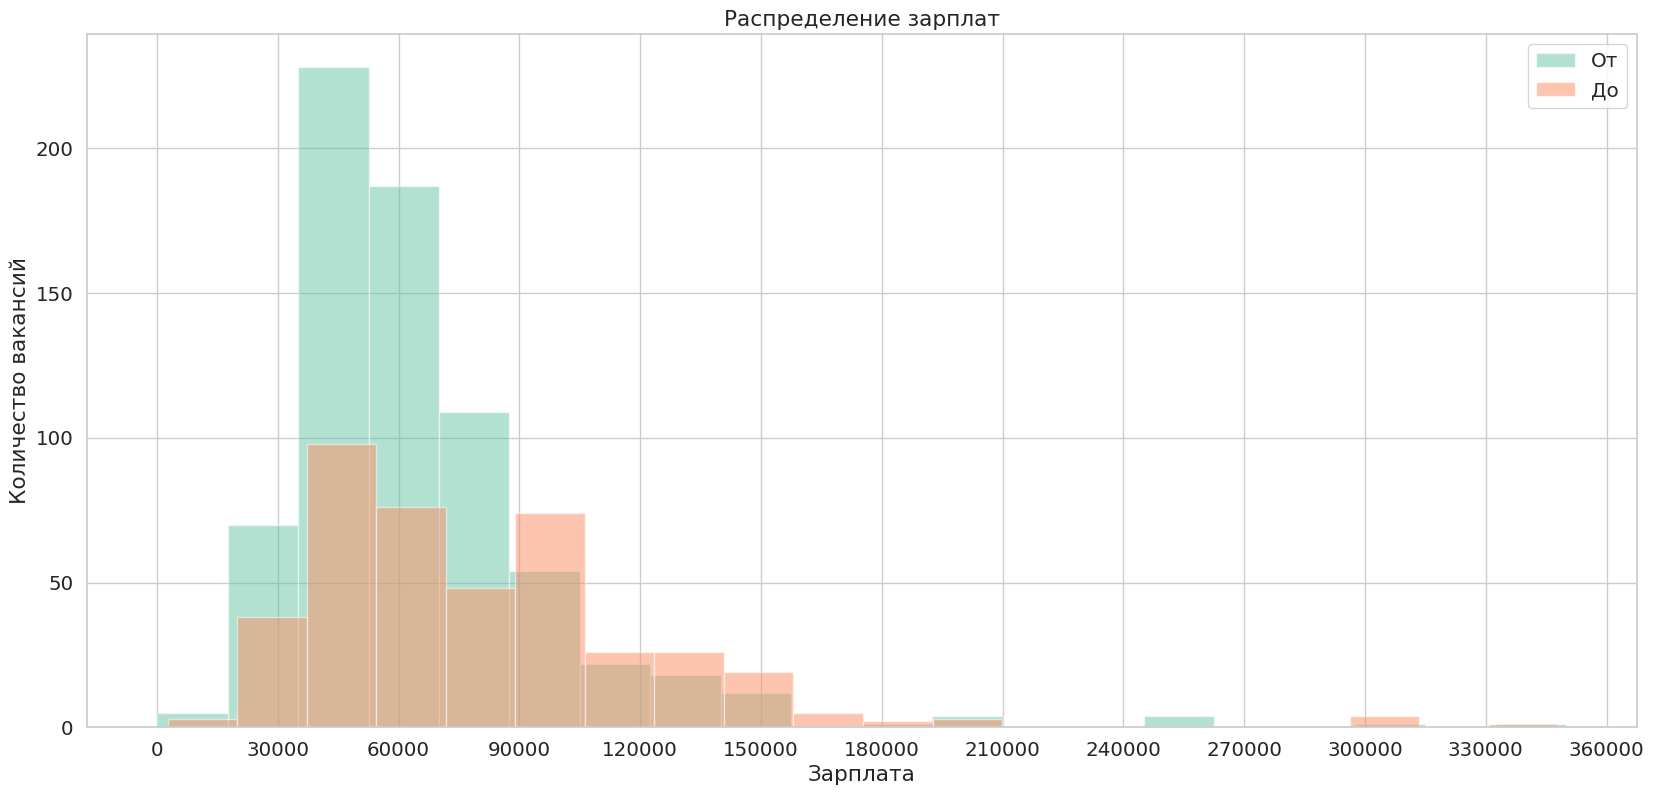

In [374]:
from_ = list(filter(
    lambda x: x is not None,
    [x['from'] for x in salaries_]
))

to_ = list(filter(
    lambda x: x is not None,
    [x['to'] for x in salaries_]
))

plt.figure(figsize=(20, 9))
plt.hist(from_, bins=20, alpha=0.5)
plt.hist(to_, bins=20, alpha=0.5)
plt.legend(['От', 'До'])
plt.xticks(salaries_range)
plt.title('Распределение зарплат')
plt.xlabel('Зарплата')
plt.ylabel('Количество вакансий')
plt.show()

##### Описание графика: Чем больше зарплата тем меньше вакансий... В основном санитары получают 40-80 тыс рублей (Net, RUR).

#### Вывод
##### Проведенное исследование показало, что по запросам по типу 'санитарt' существует 1002 вакансии на hh.ru. Чаще всего работадатели предлагают зарплату от 40 тысяч рублей (Net, RUR), некоторые готовы платить около 200 - 300 тысяч (по графику видно, что верхний лимит з/п не указан чуть ли не в половине вакансий, поэтому вывод о нем сделать трудно, но из того что мы имеем можно судить что это 80 +- 20 тысяч). Больше всего в будущих сотрудниках работадатели ценят в основном социальные скилы по типу работы в команде, грамтной речи и тд, также многие требуют умение пользоваться компьютером.

####  Общий вывод по 1 задаче
##### Аналитикам данных платят больше, чем санитарам, но и требуют больше (очевидный вывод, но какой есть :) )

---

---

---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


##### Делаю задачу для Аналитики данных

In [16]:
from plotly import express as px

In [17]:
vacancies_dataframe = pd.DataFrame(vacancies)
vacancies_dataframe['experience_type'] = vacancies_dataframe.experience.apply(lambda x: x['name'])

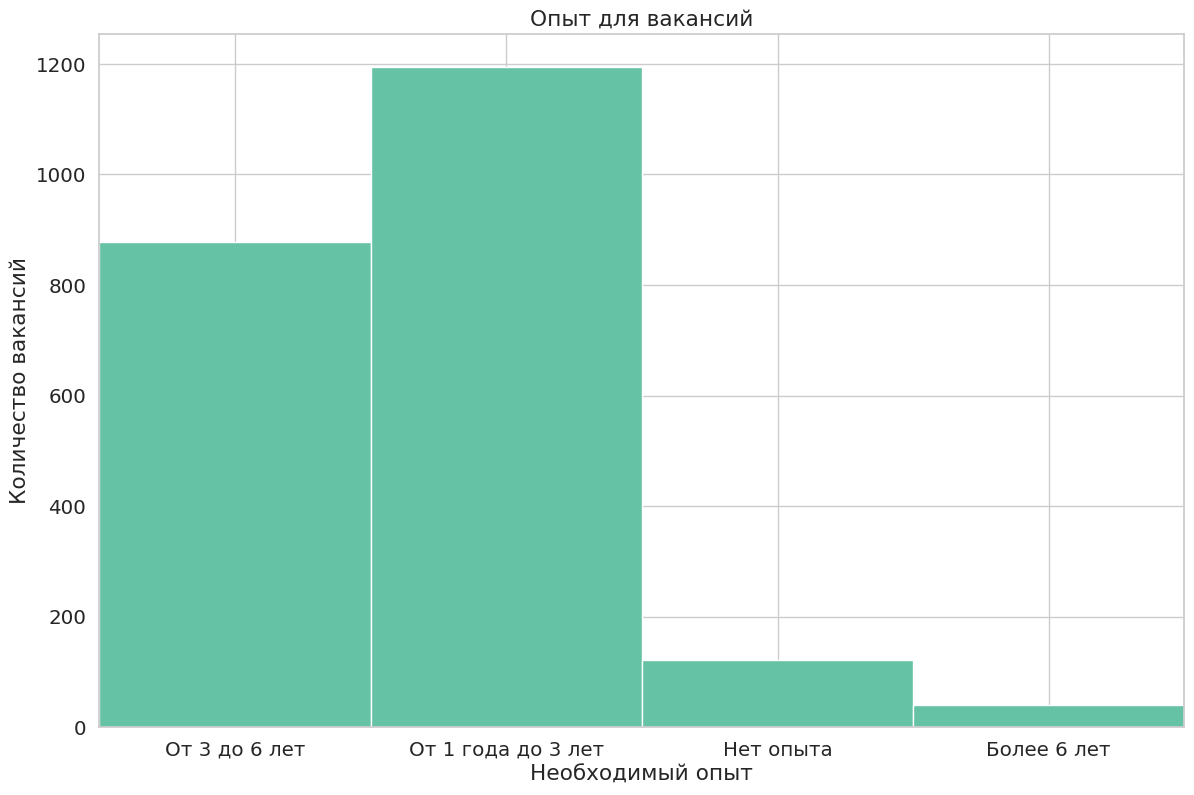

In [18]:
plt.figure(figsize=(14, 9))
plt.hist(vacancies_dataframe.experience_type, bins=np.arange(5) - 0.5)
plt.xlim((-.5, 3.5))
plt.title('Опыт для вакансий')
plt.xlabel('Необходимый опыт')
plt.ylabel('Количество вакансий')
plt.show()

##### Описание графика: Больше всего вакансий с требуемым опытом 1-6 лет.

In [19]:
vacancies_dataframe.employer = vacancies_dataframe.employer.apply(lambda x: x['name'])

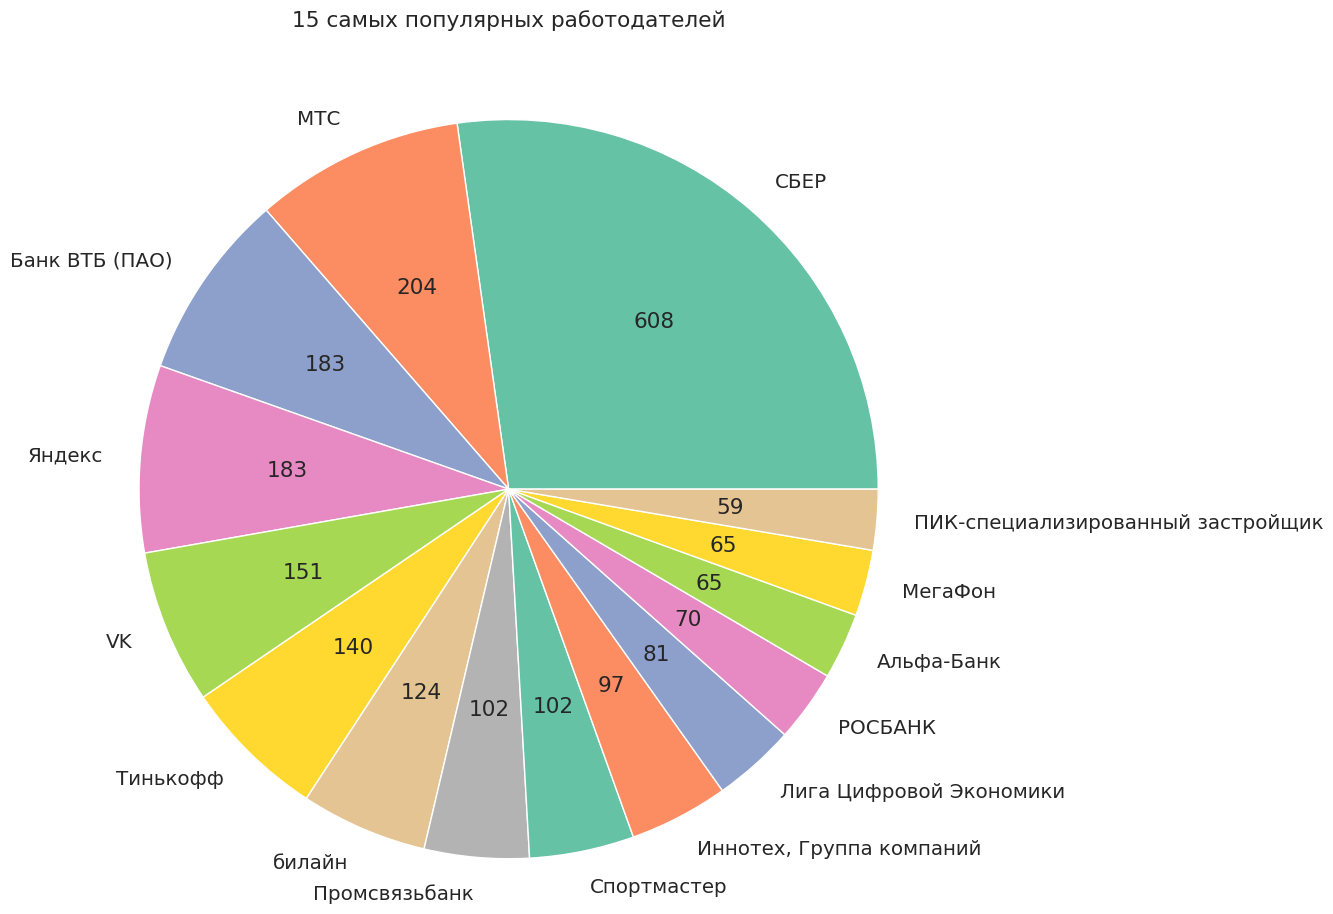

In [20]:
employers_cnt = vacancies_dataframe.employer.value_counts()
employers_cnt.head(15).plot(
    kind='pie',
    radius=2.5,
    autopct=(
        lambda x: int(np.round(x / 100 * (sum(employers_cnt)), 0))
    )
)
plt.title('15 самых популярных работодателей', pad=200)
plt.show()

##### Описание графика: Основные работодатели - IT компании, в частности, более четверти вакансий - Сбербанк.

In [21]:
def has_correct_coordinates(val):
    return val['lat'] is not None and val['lng'] is not None

In [25]:
vacancies_for_map = vacancies_dataframe.copy(deep=True).dropna(subset=['address'])
vacancies_for_map.address = vacancies_for_map[vacancies_for_map.address.apply(has_correct_coordinates)].address
vacancies_for_map.dropna(subset=['address'], inplace=True)
vacancies_for_map['latitude'] = vacancies_for_map.address.apply(lambda x: x['lat'])
vacancies_for_map['longitude'] = vacancies_for_map.address.apply(lambda x: x['lng'])
vacancies_for_map['work_type'] = vacancies_for_map.schedule.apply(lambda x: x['name'])
vacancies_for_map['vacancy_info'] = vacancies_for_map.employer.apply(lambda x: x + ', ') + vacancies_for_map.name.apply(
    lambda x: x + ', ') + vacancies_for_map.work_type

In [26]:
fig = px.scatter_mapbox(
    vacancies_for_map,
    lat="latitude",
    lon="longitude",
    opacity=1,
    center=dict(lat=55.751244, lon=37.618423),
    hover_name='vacancy_info',
    mapbox_style="stamen-terrain",
    title='Companies map',
)

fig.write_html('vacancies_map.html')
fig.show()

##### Сам график (интерактивная карта) выслан вместе с этим файлом в бота

##### Описание графика: львиная доля компаний расположе в пределах третьего транспортного кольца, да и в целом, чем ближе к центру, тем больше компаний.
##### P.S. Некоторые компании расположены относительно далеко от Москвы, хотя изначально в запросе area указывалась для Москвы; в любом случае, при наведении на точку виден тип работы (удаленка или полный день).

Какие выводы можно сделать из построенных графиков?


#### Вывод
##### Результаты исследования таковы: в основном работадатели ищут сотрудников с относительно небольшим опытом (1-6 лет), основные вакансии принадлежат компаниям, которые ассоциируются у нас с самыми популярными банками и телекоммуникационными услугами, насчет популярных.непопулярных районов - выделить какие-то конкретные не представляется возможным, компании по Москве рассредоточены +- равномерно, просто основная их часть расположена на небольшом расстоянии от центра.